In [1]:
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# load `.mat` file
data = scipy.io.loadmat('face.mat')

# Images
# N: number of images
# D: number of pixels
X = data['X']  # shape: [D x N]
y = data['l']  # shape: [1 x N]

assert(X.shape[1] == y.shape[1])
# Number of images
D, N = X.shape

# Fix the random seed
np.random.seed(13)

# Cardinality of labels
_card = len(set(y.ravel()))

# Step splitting of dataset
_step = int(N / _card)

# Shape boundaries
_bounds = np.arange(0, N+1, _step)

# Shapes
shapes = list(zip(_bounds[:-1], _bounds[1:]))

# Training Mask
_mask = []

for _shape in shapes:
    _idx = np.random.choice(
        np.arange(*_shape), int(0.8 * _step), replace=False)
    _mask.append(_idx)

mask_train = np.array(_mask).ravel()

mask_test = np.array(list(set(np.arange(0, N)) - set(mask_train)))

# Partition dataset to train and test sets
X_train, X_test = X[:, mask_train], X[:, mask_test]
y_train, y_test = y[:, mask_train], y[:, mask_test]

In [2]:
class PCA(object):
    """Principle Component Analysis."""

    def __init__(self, n_comps=5, standard=True):
        """Contructor.
        Parameters
        ----------
        n_comps: int
            Number of principle components
        """
        self._fitted = False
        self.n_comps = n_comps
        self.standard = standard
        self.mean = None
        self.U = None

    def fit(self, X):
        """Fit PCA according to `X.cov()`.
        Parameters
        ----------
        X: numpy.ndarray
            Features matrix
        Returns
        -------
        array: numpy.ndarray
            Transformed features matrix
        """
        self.D, N = X.shape
        self.mean = X.mean(axis=1).reshape(-1, 1)
        # center data
        A = X - self.mean
        # covariance matrix
        S = (1 / N) * np.dot(A.T, A)
        
        _l, _v = np.linalg.eig(S)

        _indexes = np.argsort(_l)[::-1]

        # Sorted eigenvalues and eigenvectors
        l, v = _l[_indexes], _v[:, _indexes]

        V = v[:, :self.n_comps]

        _U = np.dot(A, V)

        self.U = _U / np.apply_along_axis(np.linalg.norm, 0, _U)

        W = np.dot(self.U.T, A)

        if self.standard:
            self.W_mean = np.mean(W, axis=1)
            self.W_std = np.std(W, axis=1)

        self._fitted = True

        if self.standard:
            return ((W.T - self.W_mean) / self.W_std).T
        else:
            return W

    def transform(self, X):
        """Transform `X` by projecting it to PCA feature space.
        Parameters
        ----------
        X: numpy.ndarray
            Features matrix
        Returns
        -------
        array: numpy.ndarray
            Transformed features matrix
        """

        Phi = X - self.mean

        W = np.dot(self.U.T, Phi)

        if self.standard:
            return ((W.T - self.W_mean) / self.W_std).T
        else:
            return W

    def reconstruct(self, W):
        """Recontruct compressed data.
        Parameters
        ----------
        W: numpy.ndarray
            Projection coefficients matrix
        Returns
        -------
        X_hat: numpy.ndarray
            Reconstructed features matrix
        """
        A_hat = np.dot(self.U, W).reshape(-1, 1)
        return A_hat

In [3]:
# KNN Classifer
from sklearn.neighbors import KNeighborsClassifier

M = 1
standard = False
M_train = []
acc_train = []

while M < 408:

    D, N = X_train.shape

    pca = PCA(n_comps=M, standard=standard)

    W_train = pca.fit(X_train)

    I, K = X_test.shape

    W_test = pca.transform(X_test)

    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(W_train.T, y_train.T.ravel())
    acc = nn.score(W_test.T, y_test.T.ravel())
    print('Accuracy = %.2f%%' % (acc * 100))
    acc_train.append(acc*100)
    M_train.append(M)
    M = M + 1

Accuracy = 4.81%
Accuracy = 8.65%
Accuracy = 18.27%
Accuracy = 24.04%
Accuracy = 38.46%
Accuracy = 36.54%
Accuracy = 34.62%
Accuracy = 36.54%
Accuracy = 38.46%
Accuracy = 41.35%
Accuracy = 44.23%
Accuracy = 46.15%
Accuracy = 47.12%
Accuracy = 48.08%
Accuracy = 51.92%
Accuracy = 51.92%
Accuracy = 50.96%
Accuracy = 52.88%
Accuracy = 52.88%
Accuracy = 51.92%
Accuracy = 52.88%
Accuracy = 54.81%
Accuracy = 54.81%
Accuracy = 59.62%
Accuracy = 57.69%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 60.58%
Accuracy = 59.62%
Accuracy = 59.62%
Accuracy = 59.62%
Accuracy = 61.54%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 57.69%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 59.62%
Accuracy = 58.65%
Accuracy = 60.58%
Accuracy = 62.50%
Accuracy = 61.54%
Accuracy = 61.54%
Accuracy = 61.54%
Accuracy = 62.50%
Accuracy = 62.50%
Accuracy = 63.46%
Accuracy = 63.46%
Accuracy = 62.50%
Accuracy = 61.54%
Accuracy = 62.50%
Accuracy = 62.50%
Accuracy = 63.46%
Accuracy = 62.50%
Accuracy = 6

In [47]:
# Alternative Method

from sklearn.metrics import accuracy_score

M = 121
standard = False

D, N = X_train.shape
_step = 8
_card = 5

PCA_insts = []
y_hat = []
rec_err = []

print (X_train.shape)

for i in range(52):
    pca = PCA(n_comps=M, standard=standard)
    
    W_train = pca.fit(X_train[:,_step*i:_step*i+7])
    
    #print ("getting from indexes ", _step*i , " to ", _step*i+7, "\n")
    
    PCA_insts.append(pca)
    
    W_test = pca.transform(X_test)
    
    print("enter loop \n ")
    print (X_test.T.shape)
    print (W_test.T.shape)
    
    for k, (x, w) in enumerate(zip(X_test.T, W_test.T)):
    
        #print("loop for ", k, "\n")
        x_hat = pca.reconstruct(w)
        
        _rec_err = np.linalg.norm(x_hat-x)
        
        if len(y_hat) <= k:
            print ("added element ", k)
            y_hat.append(int(i))
            rec_err.append(_rec_err)
        elif _rec_err < rec_err[k]:
            print ("_rec_err = ", _rec_err, " and rec_err[k] = ", rec_err[k])
            print ("k = ", k)
            y_hat[k] = int(i)
            rec_err[k] = _rec_err




(2576, 416)
enter loop 
 
(104, 2576)
(104, 7)
added element  0
added element  1
added element  2
added element  3
added element  4
added element  5
added element  6
added element  7
added element  8
added element  9
added element  10
added element  11
added element  12
added element  13
added element  14
added element  15
added element  16
added element  17
added element  18
added element  19
added element  20
added element  21
added element  22
added element  23
added element  24
added element  25
added element  26
added element  27
added element  28
added element  29
added element  30
added element  31
added element  32
added element  33
added element  34
added element  35
added element  36
added element  37
added element  38
added element  39
added element  40
added element  41
added element  42
added element  43
added element  44
added element  45
added element  46
added element  47
added element  48
added element  49
added element  50
added element  51
added element  52
added ele

_rec_err =  201870.8458975349  and rec_err[k] =  243571.72142205454
k =  14
_rec_err =  196768.53443831956  and rec_err[k] =  245401.49745820984
k =  15
_rec_err =  234002.169618526  and rec_err[k] =  251606.89531747892
k =  16
_rec_err =  164167.5270581706  and rec_err[k] =  184786.21957442525
k =  17
_rec_err =  262520.5002016241  and rec_err[k] =  280841.1686160437
k =  18
_rec_err =  269238.69290818117  and rec_err[k] =  296440.11435198603
k =  19
_rec_err =  234355.8837908483  and rec_err[k] =  246517.65798603796
k =  20
_rec_err =  192342.15344944273  and rec_err[k] =  230558.99123938984
k =  21
_rec_err =  215184.24826146103  and rec_err[k] =  241800.7186383755
k =  22
_rec_err =  203290.97385952433  and rec_err[k] =  233294.84741147878
k =  23
_rec_err =  200673.9404482227  and rec_err[k] =  236031.61628816117
k =  24
_rec_err =  205135.57712554457  and rec_err[k] =  232292.07804583735
k =  25
_rec_err =  242535.6003804157  and rec_err[k] =  275565.7382307285
k =  26
_rec_err =

enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
enter loop 
 
(104, 2576)
(104, 7)
_rec_err =  232402.8190814794  and rec_err[k] =  245382.6975280636
k =  2
_rec_err =  250255.97108131985  and rec_err[k] =  258785.32404768185
k =  4
_rec_err =

In [44]:
print ("y_hat len = ", len(y_hat))

print (y_hat)
print (y_test)
print ("y_test shape: ", y_test.T.shape)
acc = accuracy_score(y_test.T, y_hat)    
print('Accuracy = %.2f%%' % (acc * 100))
    
    
    
    
print (PCA_insts)
print (len(PCA_insts))

y_hat len =  104
[3, 3, 48, 3, 48, 48, 3, 3, 3, 3, 48, 48, 3, 3, 3, 3, 3, 3, 48, 48, 3, 3, 3, 3, 3, 3, 48, 3, 3, 3, 48, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 23, 48, 3, 3, 3, 48, 3, 3, 3, 17, 2, 48, 48, 48, 3, 48, 3, 48, 2, 17, 3, 3, 3, 48, 48, 48, 48, 48, 17, 48, 17, 3, 3, 48, 3, 3, 48, 48, 48, 3, 3, 17, 3, 3, 3, 48, 17, 48, 48, 3, 3, 48, 3, 48, 3, 48, 3, 3, 3]
[[ 1  1 52 52  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
  12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
  24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35
  36 36 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47
  48 48 49 49 50 50 51 51]]
y_test shape:  (104, 1)
Accuracy = 2.88%
[<__main__.PCA object at 0x181587d550>, <__main__.PCA object at 0x1a1ffce940>, <__main__.PCA object at 0x1815b08a58>, <__main__.PCA object at 0x18157dd668>, <__main__.PCA object at 0x18158026a0>, <__main__.PCA object at 0x1a2000b390>, <__main__.PCA object at 0x18158

Text(0,0.5,'Recogniton Accuracy / %')

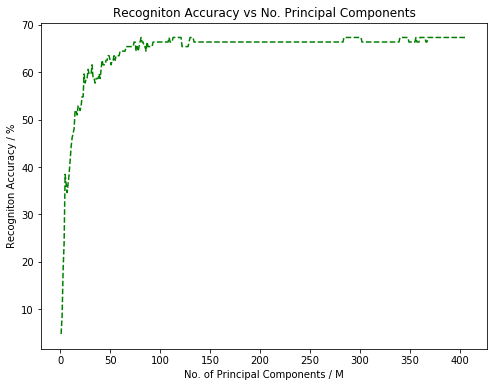

In [4]:
plt.figure(figsize=(8.0, 6.0))
plt.plot(M_train, acc_train, color='green', linestyle='dashed')
plt.title('Recogniton Accuracy vs No. Principal Components')
plt.xlabel('No. of Principal Components / M')
plt.ylabel('Recogniton Accuracy / %')

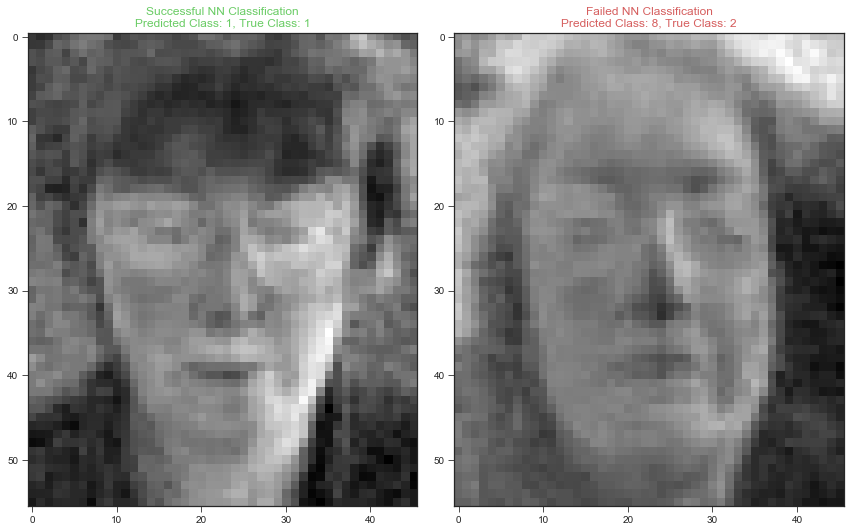

In [5]:
# prettify plots
plt.rcParams['figure.figsize'] = [12.0, 9.0]
sns.set_palette(sns.color_palette("muted"))
_palette = sns.color_palette("muted")
sns.set_style("ticks")

y_hat = nn.predict(W_test.T)

done = {'success': False, 'failure': False}

fig, axes = plt.subplots(ncols=2)

for y, t, w in zip(y_hat, y_test.T.ravel(), W_test.T):
    if y == t and done['success'] is False:
        x_hat = pca.reconstruct(w)
        axes[0].imshow(x_hat.reshape(46,56).T,
                       cmap=plt.get_cmap('gray'))
        axes[0].set_title(
            'Successful NN Classification\nPredicted Class: %d, True Class: %d' % (y, t), color=_palette[1])
        done['success'] = True
    elif y != t and done['failure'] is False:
        x_hat = pca.reconstruct(w)
        axes[1].imshow(x_hat.reshape(46,56).T,
                       cmap=plt.get_cmap('gray'))
        axes[1].set_title(
            'Failed NN Classification\nPredicted Class: %d, True Class: %d' % (y, t), color=_palette[2])
        done['failure'] = True
    #elif done['failure'] is True and done['success'] is True:
     #break

fig.tight_layout()